<a href="https://colab.research.google.com/github/oakerekan/Bayes---Hamoye---Remittance-Pattern-and-Economic-development/blob/main/Remittance_Patterns_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Remittance Patterns and Economic Development

<a id='Introduction'></a>
# Description of dataset

This notebook shows the exploratory data analysis of datasets regarding worldwide economic remittances. The data used for this analysis is from [the Global Knowledge Partnership on Migration and Development (KNOMAD)](https://www.knomad.org/data/remittances) website in their broader effort to fill the knowledge gaps for monitoring and analyzing migration and remittances. It provides remittance data movements (inbound and outbound) between various countries. 

The codes for data cleaning can be found on these links [Remittance inflows](https://github.com/oakerekan/Bayes---Hamoye---Remittance-Pattern-and-Economic-development/blob/main/Data_Cleaning_Remittance_Inflows.ipynb) and [Remittance outflows](https://github.com/oakerekan/Bayes---Hamoye---Remittance-Pattern-and-Economic-development/blob/main/Data_Cleaning_Remittance_Outflows.ipynb).

Summary Content:
* Number of countries involved: 214
* Time period: 1990 till 2022
* Unit of measurement: All values are in terms of millions of US dollars.
* This dataset contains three files:
    * `bilateral-remittance.csv` - Estimated remittances between world countries in the year 2021.
    * `remittance-inflows.csv` - Historical remittance money inflow into world countries since 1990. 
    * `remittance-outflows.csv` - Historical remittance money outflow from world countries since 1990. 

The dataset has been cleaned for use in this project. The codes for the data cleaning can be viewed on following Github links [Remittance Inflows](https://github.com/oakerekan/Bayes---Hamoye---Remittance-Pattern-and-Economic-development/blob/main/Data_Cleaning_Remittance_Inflows.ipynb) and [Remittance ouflows](https://github.com/oakerekan/Bayes---Hamoye---Remittance-Pattern-and-Economic-development/blob/main/Data_Cleaning_Remittance_Outflows.ipynb).

To get the subregion for each country, dataset was combined with the country to continent dataset from [Kaggle](https://www.kaggle.com/datasets/statchaitya/country-to-continent/download?datasetVersionNumber=1). 

**All monetary values are in terms of millions of US dollars**.

## Exploratory Data Analysis

In [26]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [27]:
# filepaths
path1 = '/content/remittance_inflows.csv'
path2 = '/content/remittance_outflows.csv'
path3 = '/content/bilateral_remittance_matrix.csv'

In [28]:
# Load datasets
inflow = pd.read_csv(path1, encoding = "ISO-8859-1")
outflow = pd.read_csv(path2, encoding = "ISO-8859-1")
bilateral = pd.read_csv(path3,index_col=0,encoding = "ISO-8859-1")

In [29]:
# Snippet of 'inflow' Dataframe
inflow

,Migrant remittance inflows (US$ million),1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,%GDP_2022
0,Afghanistan,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,253.367822,348.624717,627.710802,822.731630,803.546454,828.571904,788.917115,300.000000,350.000000,2.058824
1,Albania,0.000000,0.000000,151.800000,332.000000,307.100000,427.3,550.9,300.3,504.140000,...,1421.007454,1290.863508,1306.009167,1311.822432,1458.210056,1472.812242,1465.987212,1718.320554,1800.000000,9.859772
2,Algeria,352.441760,232.990263,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,2452.442617,1997.393458,1989.023597,1791.887073,1984.998399,1785.838683,1699.608935,1759.095247,1829.459057,0.977510
3,American Samoa,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Andorra,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,21.100000,47.416324,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Virgin Islands (U.S.),0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
210,West Bank and Gaza,0.000000,0.000000,0.000000,0.000000,0.000000,582.1,542.3,623.3,1058.245498,...,1804.542445,1817.412109,2086.576176,2378.923437,2833.912788,3152.859814,2559.660846,3393.364900,3495.165847,18.573525
211,"Yemen, Rep.",0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,3350.500000,3350.500000,3770.584000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
212,Zambia,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,58.300302,47.046538,38.464441,93.644095,106.965626,98.259121,134.864832,241.688413,260.150000,0.962627


In [30]:
# Summary Statistics
inflow.describe().T.style.background_gradient(cmap='viridis')

,count,mean,std,min,25%,50%,75%,max
1990,214.000000,267.982182,823.233223,0.000000,0.000000,0.000000,51.937500,5025.494576
1991,214.000000,274.375573,816.812708,0.000000,0.000000,0.000000,55.465521,4808.500000
1992,214.000000,309.165111,910.932831,0.000000,0.000000,0.000000,75.759744,6104.000000
1993,214.000000,310.770694,875.394331,0.000000,0.000000,0.017265,79.190371,5664.000000
1994,214.000000,334.877079,880.726341,0.000000,0.000000,0.733565,99.640376,5856.694458
1995,214.000000,385.463959,994.660484,0.000000,0.000000,1.312304,123.825000,6222.996282
1996,214.000000,405.648852,1069.144207,0.000000,0.000000,5.434832,143.320428,8765.693607
1997,214.000000,480.217743,1353.190202,0.000000,0.000000,6.065111,228.427300,10330.965040
1998,214.000000,468.420901,1314.495079,0.000000,0.000000,12.035185,250.204160,10021.054780
1999,214.000000,539.271406,1443.833143,0.000000,0.000000,18.478704,334.111983,11124.280840


From the above line of code, `df.describe().T.style.background_gradient(cmap='viridis')` creates a styled representation of the summary statistics DataFrame, with the values colored according to their relative magnitude. This can be useful for quickly identifying which columns have higher or lower mean, median, or other statistics, and for identifying any outliers or skewness in the data.

In [31]:
# Snippet of outflow dataset
outflow.head()

,Outward remittance flows (US$ million),1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,%GDP_2021
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,445,524,229,168,144,235,217,225,0,0.00
1,Albania,0,0,0,0,0,0,0,0,0,...,191,179,153,147,106,115,120,125,140,0.80
2,Algeria,31,22,0,0,0,0,0,0,0,...,39,296,72,77,214,87,82,149,81,0.05
3,American Samoa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.00
4,Andorra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,92,84,0,0.00


In [32]:
# # Create a new column 'total_in_USD' containing the sum of values per row (axis=1)
inflow.drop(columns=['%GDP_2022'],inplace=True)
inflow['total_in_USD'] = inflow.sum(axis=1)

outflow.drop(columns=['%GDP_2021'],inplace=True)
outflow['total_in_USD'] = outflow.sum(axis=1)

In [33]:
# Sort values by highest USD sum total (25)
inflow_top = inflow.sort_values(by='total_in_USD',ascending=False).head(25)
outflow_top = outflow.sort_values(by='total_in_USD',ascending=False).head(25)

In [34]:
# Rename column and reset index
inflow_top.rename(columns={'Migrant remittance inflows (US$ million)':'Country'}, inplace=True)
inflow_top.reset_index(drop=True, inplace=True)

outflow_top.rename(columns={'Outward remittance flows (US$ million)':'Country'}, inplace=True)
outflow_top.reset_index(drop=True, inplace=True)

In [35]:
# Sample of data for Top remittance inflow countries
inflow_top.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,total_in_USD
0,India,2383.740066,3289.109445,2897.425637,3522.788021,5856.694458,6222.996282,8765.693607,10330.965040,9479.30035,...,70388.64280,68909.69335,62744.36409,68967.17550,78790.17093,83332.07800,83149.17293,89375.15222,100000.0,1.293798e+06
1,China,124.000000,207.000000,228.000000,108.000000,395.000000,350.000000,1672.000000,4589.000000,344.00000,...,62332.34231,63937.64659,60999.99949,63875.67411,67413.59206,68398.47511,59506.67335,53000.00000,51000.0,9.850412e+05
2,Mexico,3098.000000,3030.000000,3700.000000,3979.000000,4121.820000,4368.120000,4949.000000,5545.800000,6501.24600,...,24802.08133,26233.17180,28690.95741,32270.50768,35768.41663,39021.78968,42878.27491,54130.11145,60300.0,6.714579e+05
3,Philippines,1465.000000,1850.000000,2537.000000,2587.000000,3452.000000,5360.000000,4875.000000,6799.000000,5130.00000,...,28690.79790,29799.39570,31141.97348,32809.77043,33808.96799,35167.47183,34882.84455,36685.31317,38000.0,5.692736e+05
4,France,3839.266956,4429.122420,4960.629080,4769.841215,3748.573694,4434.302326,4334.903528,9741.087205,10021.05478,...,25358.37473,24066.98984,24042.34885,24884.54786,26229.27471,30024.72508,28823.15746,32077.31222,28520.0,5.349854e+05


In [36]:
#checking for correlation between features and target variable
corr_data = inflow.corr().abs()['total_in_USD'].sort_values(ascending=False)
corr_data

total_in_USD    1.000000
2019            0.991417
2018            0.990779
2017            0.989507
2020            0.988433
2016            0.988208
2014            0.987236
2013            0.986650
2015            0.986145
2009            0.985965
2012            0.985540
2010            0.983084
2008            0.981229
2011            0.980707
2021            0.979627
2007            0.973223
2022            0.969023
2006            0.957447
2005            0.948463
2003            0.877026
2004            0.874356
2002            0.854758
1997            0.847838
2001            0.817863
1996            0.797464
2000            0.793637
1999            0.760693
1998            0.742740
1994            0.727090
1995            0.711032
1993            0.627805
1991            0.592727
1992            0.580851
1990            0.533758
Name: total_in_USD, dtype: float64

<a id='Static-Graphs'></a>
## Visualizations: Top 25 countries with most inflows and outflows

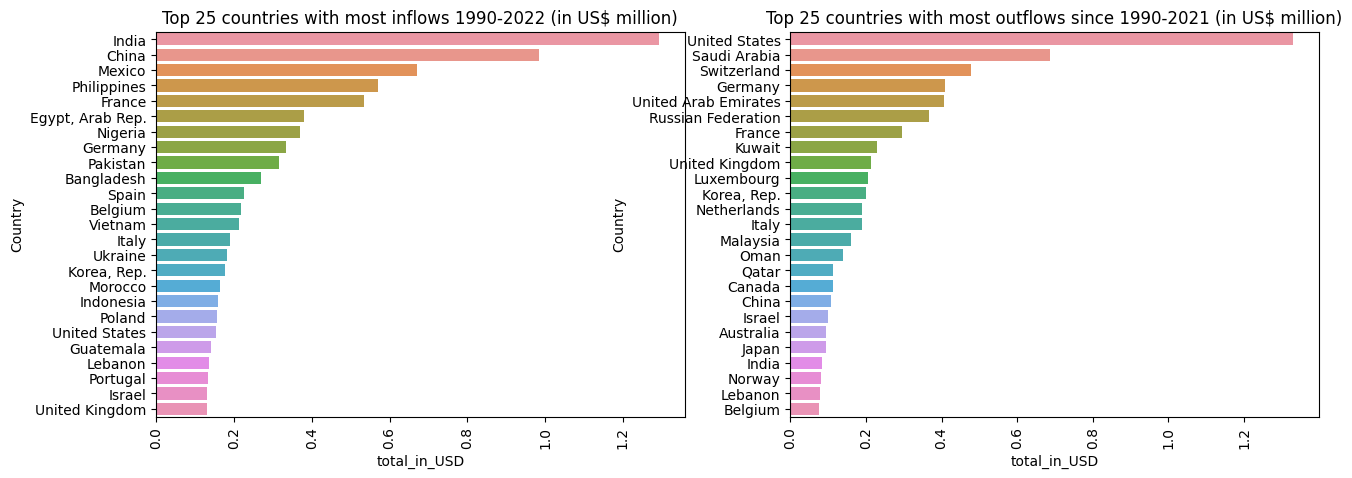

In [38]:
# Create a figure with two subplots
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

# Plot the first bar chart on the left subplot
sns.barplot(x='total_in_USD', y='Country', data=inflow_top, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_title('Top 25 countries with most inflows 1990-2022 (in US$ million)')

# Plot the second bar chart on the right subplot
sns.barplot(x='total_in_USD', y='Country', data=outflow_top, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_title('Top 25 countries with most outflows since 1990-2021 (in US$ million)')

# Display the figure
plt.show()


To get more visuals, we combined the inflow dataset with country to continent dataset

In [39]:
# Get the subregion for each country
df_c = pd.read_csv('/content/countryContinent.csv',delimiter=',', encoding = "ISO-8859-1")
df_c.head()

,Country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,?land Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0


In [40]:
# Select `continent' and `sub_region` columns
df_c = df_c[['Country', 'sub_region']]
df_c.head()

,Country,sub_region
0,Afghanistan,Southern Asia
1,?land Islands,Northern Europe
2,Albania,Southern Europe
3,Algeria,Northern Africa
4,American Samoa,Polynesia


In [41]:
# Rename columns
inflow = inflow.rename(columns={'Migrant remittance inflows (US$ million)': 'Country'})
outflow = outflow.rename(columns={'Outward remittance flows (US$ million)': 'Country'})

In [42]:
# Merge the two dataframes
inflow_df = pd.merge(inflow, df_c, on='Country')
outflow_df = pd.merge(outflow,df_c, on='Country')
inflow_df.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2015,2016,2017,2018,2019,2020,2021,2022,total_in_USD,sub_region
0,Afghanistan,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,348.624717,627.710802,822.731630,803.546454,828.571904,788.917115,300.000000,350.000000,6477.570209,Southern Asia
1,Albania,0.00000,0.000000,151.8,332.0,307.1,427.3,550.9,300.3,504.14,...,1290.863508,1306.009167,1311.822432,1458.210056,1472.812242,1465.987212,1718.320554,1800.000000,33846.626379,Southern Europe
2,Algeria,352.44176,232.990263,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,1997.393458,1989.023597,1791.887073,1984.998399,1785.838683,1699.608935,1759.095247,1829.459057,19411.065029,Northern Africa
3,American Samoa,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Polynesia
4,Andorra,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.000000,0.000000,0.000000,0.000000,21.100000,47.416324,0.000000,0.000000,68.516324,Southern Europe


In [43]:
# Display the merged ouflow_df
outflow_df.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2014,2015,2016,2017,2018,2019,2020,2021,total_in_USD,sub_region
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,524,229,168,144,235,217,225,0,4596,Southern Asia
1,Albania,0,0,0,0,0,0,0,0,0,...,179,153,147,106,115,120,125,140,2408,Southern Europe
2,Algeria,31,22,0,0,0,0,0,0,0,...,296,72,77,214,87,82,149,81,1437,Northern Africa
3,American Samoa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Polynesia
4,Andorra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,92,84,0,176,Southern Europe


In [44]:
# Group the countries by sub-region
grouped_inflow = inflow_df.groupby('sub_region')['total_in_USD'].sum().sort_values(ascending=False)
grouped_outflow = outflow_df.groupby('sub_region')['total_in_USD'].sum().sort_values(ascending=False)

### Visualization for Total Remittance inflows and outflows by sub-regions

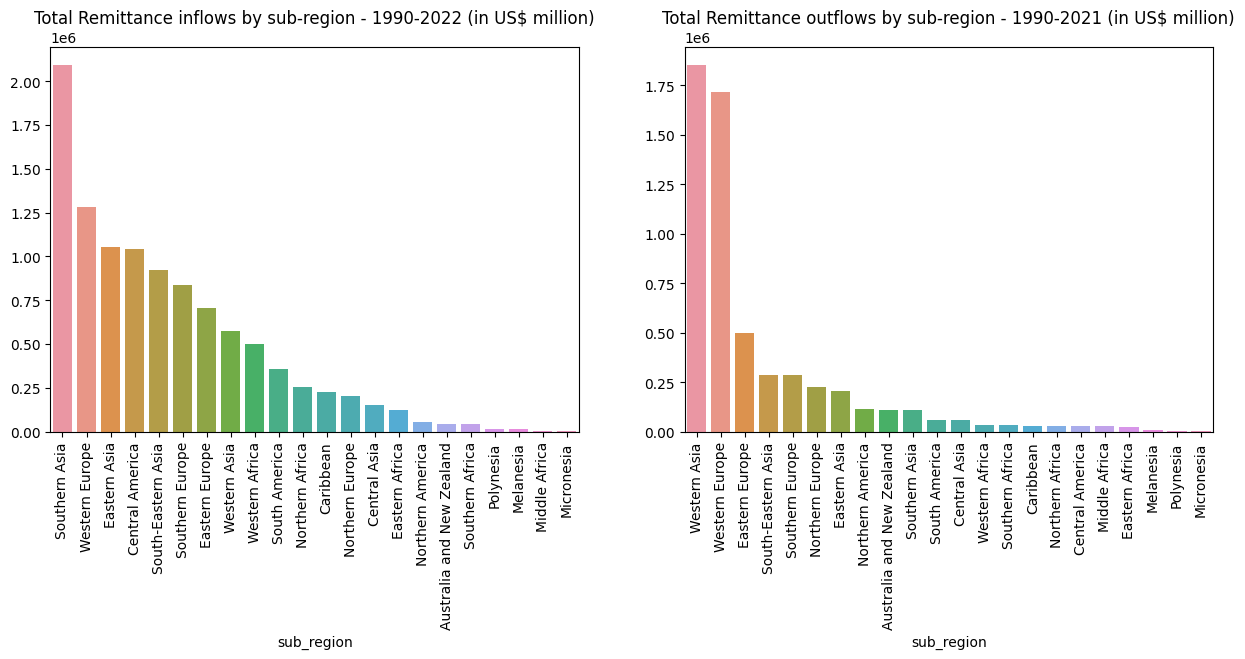

In [45]:
# Create a figure with two subplots
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

# Plot the first bar chart on the left subplot
sns.barplot(x=grouped_inflow.index, y=grouped_inflow.values, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_title('Total Remittance inflows by sub-region - 1990-2022 (in US$ million)')

# Plot the second bar chart on the right subplot
sns.barplot(x=grouped_outflow.index, y=grouped_outflow.values, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_title('Total Remittance outflows by sub-region - 1990-2021 (in US$ million)')

# Display the figure
plt.show()

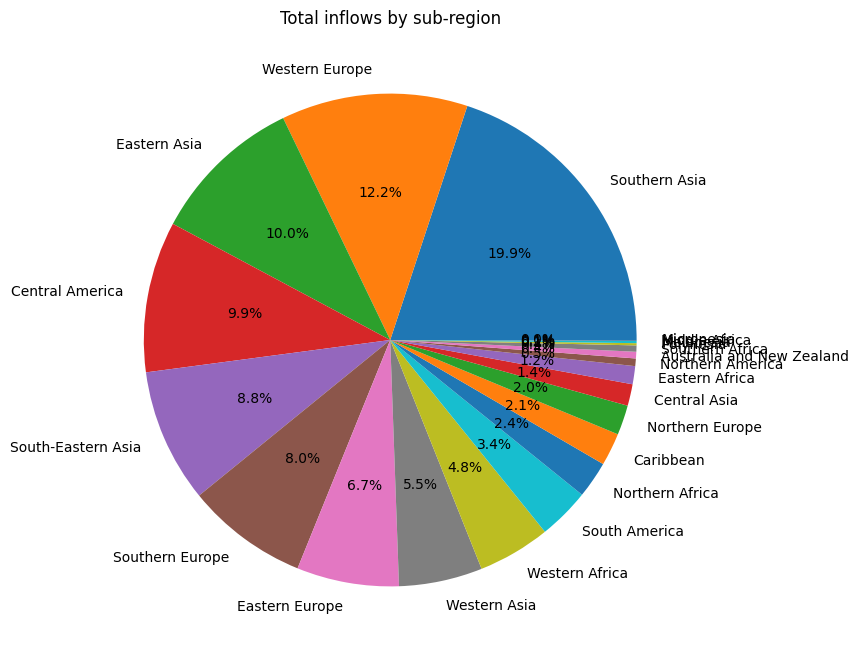

In [46]:
# Create a pie chart of the total inflows by sub-region
plt.figure(figsize=(8,8))
plt.pie(grouped_inflow.values, labels=grouped_inflow.index, autopct='%1.1f%%')
plt.title('Total inflows by sub-region')
plt.show()

In [47]:
# Drop column 'total_in_USD'
inflow_df = inflow_df.drop('total_in_USD', axis=1)

# Transpose the dataframe
inflow_df_t = inflow_df.T

In [48]:

# Get time values per country
inflow_df_t.columns = inflow_df_t.iloc[0]
inflow_df_t = inflow_df_t.drop(['Country', 'sub_region'])

# Get country name per sub region
country = []
sub_region = []

cont_region = pd.DataFrame()
for i in inflow_df['sub_region'].unique():
    country.append(inflow_df[inflow_df['sub_region'] == i]['Country'])
    sub_region.append(i)

In [49]:
sub_region

['Southern Asia',
 'Southern Europe',
 'Northern Africa',
 'Polynesia',
 'Middle Africa',
 'Caribbean',
 'South America',
 'Western Asia',
 'Australia and New Zealand',
 'Western Europe',
 'Eastern Europe',
 'Central America',
 'Western Africa',
 'Northern America',
 'Southern Africa',
 'South-Eastern Asia',
 'Eastern Africa',
 'Eastern Asia',
 'Northern Europe',
 'Melanesia',
 'Micronesia',
 'Central Asia']

In [50]:
#plot Remittance inflows for every country per sub-region
for i in range(len(sub_region)):
    
    fig = px.line(inflow_df_t[country[i]], 
                  title = sub_region[i], 
                  labels={
                      'index': '',
                      'value': ''
                  })
    fig.show()